# 1.0 Stock Data Exploration

This notebook demonstrates using our data pipeline to download, process, and visualize stock data statistics.

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.config import get_config
from src.dataset import download_raw, compute_returns
from src.plots import plot_price, plot_returns

## 1. Download Historical Stock Data

In [2]:
config = get_config()
print(f"Default ticker: {config['ticker']}")
print(f"Default period: {config['period']}")
print(f"Default interval: {config['interval']}")

ticker = "GOOGL"

Default ticker: AAPL
Default period: 10y
Default interval: 1d


In [3]:
raw_data = download_raw(ticker, save=True)
raw_data.tail()

[*********************100%***********************]  1 of 1 completed

Saved raw data for GOOGL to /Users/hedibelkahia/codes/algo-trader/data/raw/GOOGL/GOOGL_10y_2025-08-19.csv


,open,high,low,close,volume
Date,,,,,
2025-08-12,201.369995,204.500000,200.589996,203.339996,30397900
2025-08-13,204.130005,204.529999,197.509995,201.960007,28342900
2025-08-14,201.500000,204.440002,201.229996,202.940002,25230400
2025-08-15,203.850006,206.440002,201.279999,203.899994,34911300
2025-08-18,204.160004,205.250000,202.490005,203.500000,18476169


## 2. Clean and Process Data

In [4]:
data = compute_returns(raw_data)
data.tail()

,open,high,low,close,volume,daily_return,log_return,tot_return,volatility_20d
Date,,,,,,,,,
2025-08-12,201.369995,204.500000,200.589996,203.339996,30397900,0.011642,0.011575,3.898059,0.013064
2025-08-13,204.130005,204.529999,197.509995,201.960007,28342900,-0.006787,-0.006810,3.871514,0.013353
2025-08-14,201.500000,204.440002,201.229996,202.940002,25230400,0.004852,0.004841,3.890255,0.013347
2025-08-15,203.850006,206.440002,201.279999,203.899994,34911300,0.004730,0.004719,3.908614,0.013329
2025-08-18,204.160004,205.250000,202.490005,203.500000,18476169,-0.001962,-0.001964,3.900939,0.012344


## 3. Data Visualization

In [5]:
fig_stock = plot_price(data, ticker, save=False, normalized=False)
fig_stock.show()

Figure saved to /Users/hedibelkahia/codes/algo-trader/reports/figures/GOOGL_returns_distribution.png


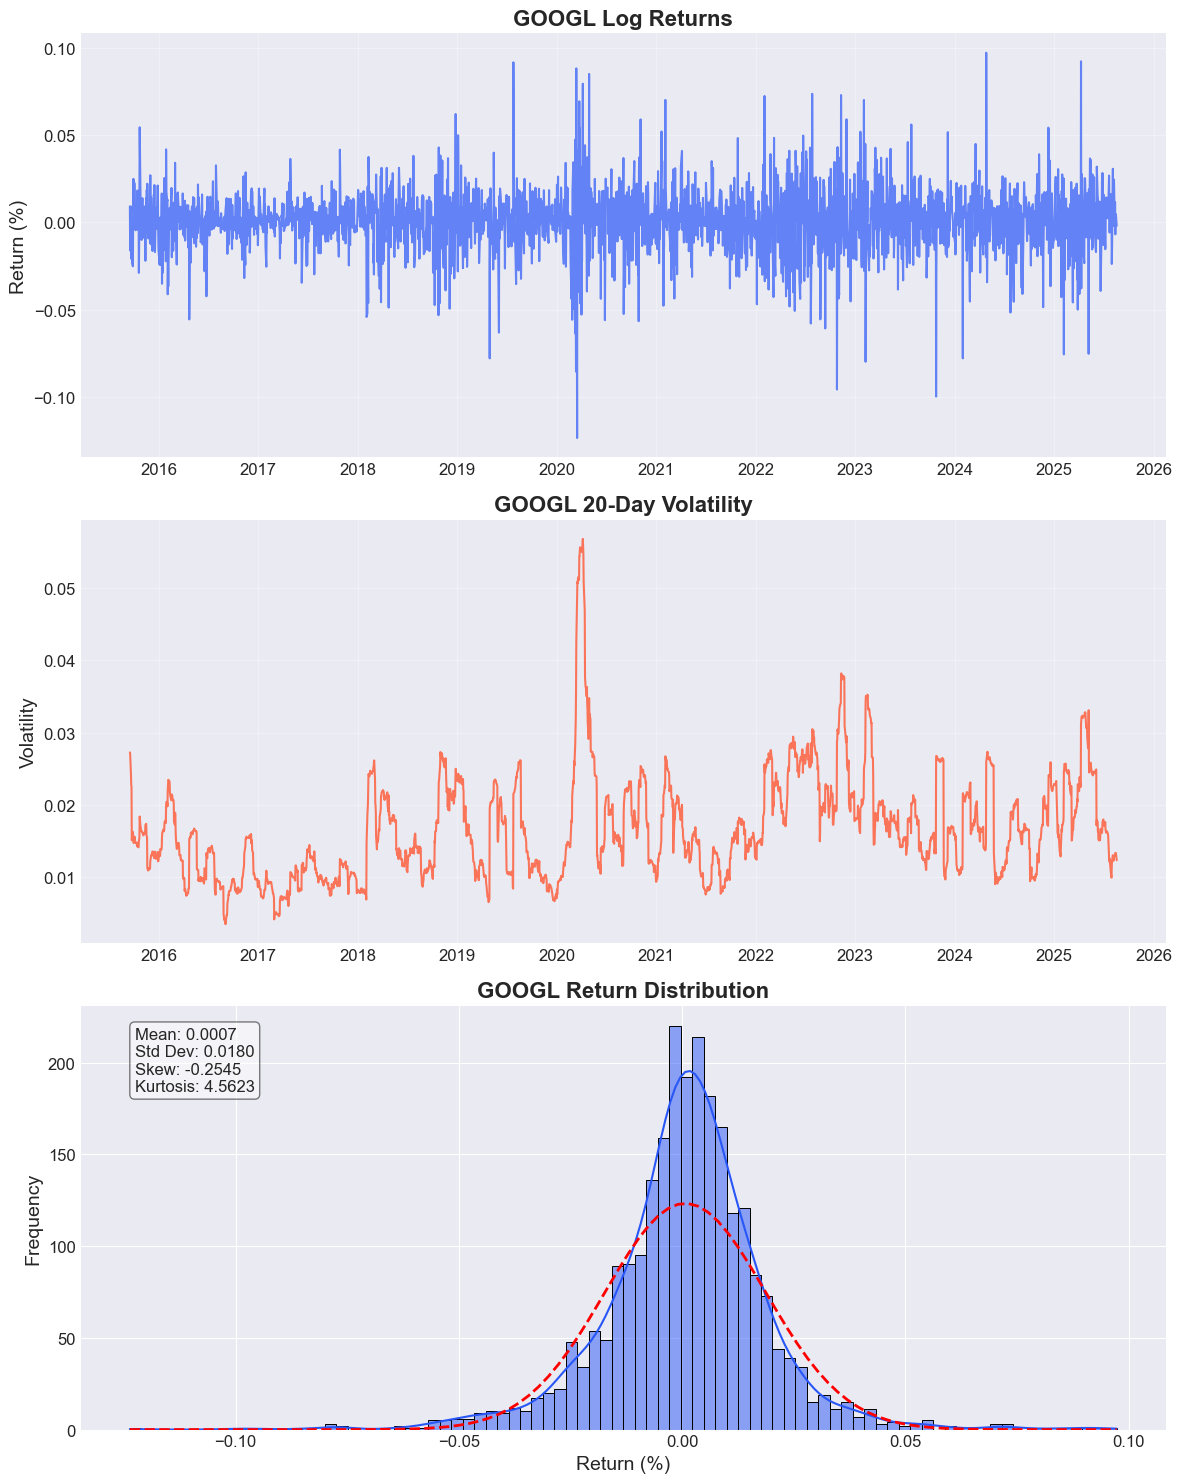

In [6]:
fig_returns = plot_returns(data, ticker, save=True)